In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')


In [ ]:
!pip install finance-datareader
import FinanceDataReader as fdr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
samsung = fdr.DataReader('005930', '2015')
samsung.head(10000)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-01-02,26799,26799,26540,26600,175499,0.002261
2015-01-05,26720,26720,26260,26660,202790,0.002256
2015-01-06,26300,26340,25760,25900,304710,-0.028507
2015-01-07,25880,26220,25640,26140,286455,0.009266
2015-01-08,26780,26780,26199,26280,289552,0.005356
...,...,...,...,...,...,...
2023-06-02,71700,72200,71600,72200,12161798,0.018336
2023-06-05,72700,72700,71400,71700,12686829,-0.006925
2023-06-07,71300,71600,70800,71000,14796613,-0.009763


In [ ]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-06-02,71700,72200,71600,72200,12161798,0.018336
2023-06-05,72700,72700,71400,71700,12686829,-0.006925
2023-06-07,71300,71600,70800,71000,14796613,-0.009763
2023-06-08,70400,70900,70000,70900,19165568,-0.001408
2023-06-09,71100,72300,70800,72000,14967908,0.015515


In [ ]:
samsung.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2023-05-24', '2023-05-25', '2023-05-26', '2023-05-30',
               '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-05',
               '2023-06-07', '2023-06-08'],
              dtype='datetime64[ns]', name='Date', length=2076, freq=None)

In [ ]:
samsung['Year'] = samsung.index.year
samsung['Month'] = samsung.index.month
samsung['Day'] = samsung.index.day

In [ ]:
samsung.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
2015-01-02,26799,26799,26540,26600,175499,0.002261,2015,1,2
2015-01-05,26720,26720,26260,26660,202790,0.002256,2015,1,5
2015-01-06,26300,26340,25760,25900,304710,-0.028507,2015,1,6
2015-01-07,25880,26220,25640,26140,286455,0.009266,2015,1,7
2015-01-08,26780,26780,26199,26280,289552,0.005356,2015,1,8


Text(0, 0.5, 'price')

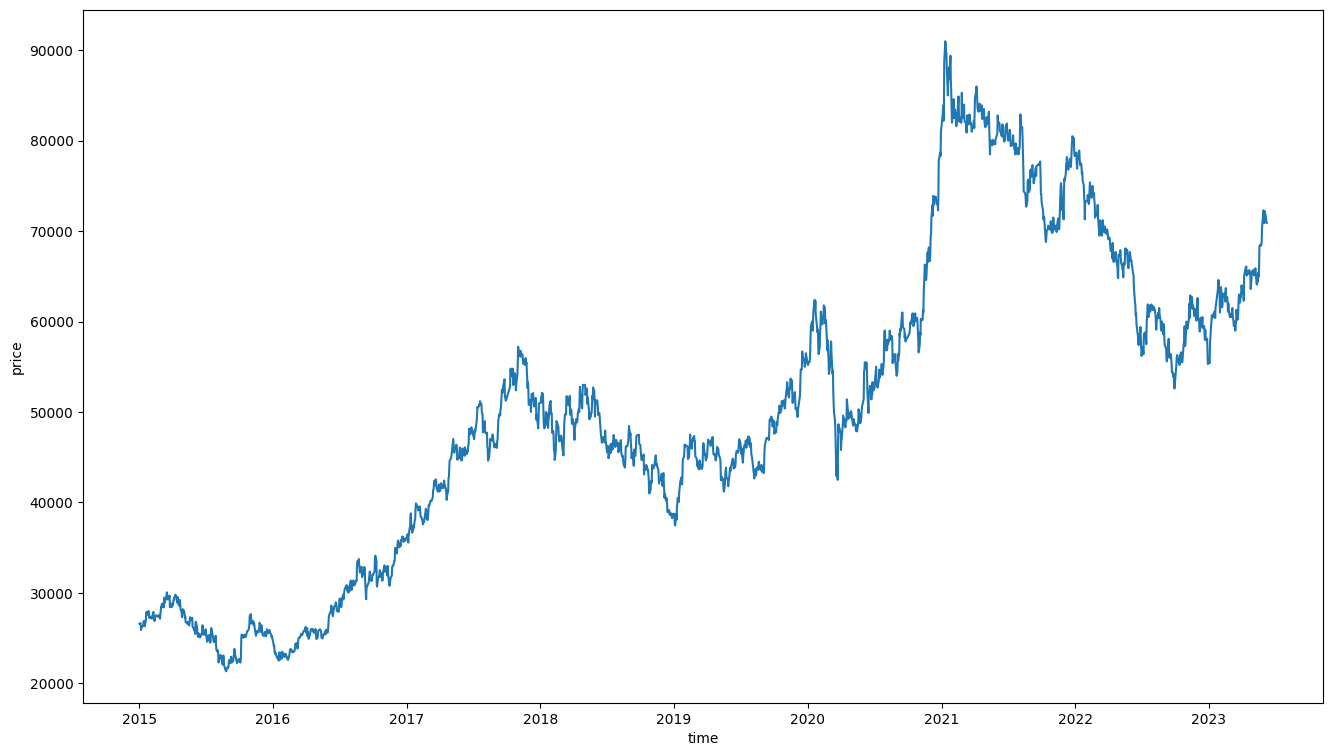

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=samsung['Close'], x=samsung.index)
plt.xlabel('time')
plt.ylabel('price')

### 변수 추가

In [ ]:
samsung['color'] = -1
samsung.loc[(samsung['Close'] - samsung['Open']) > 0, 'color'] = 1

In [ ]:
samsung['bar_length'] = abs((samsung['Close'] - samsung['Open']) / samsung['Open'])

In [ ]:
samsung['red_bar'] = 0
samsung.loc[samsung['color'] == 1, 'red_bar'] = samsung['color'] * samsung['bar_length']

In [ ]:
samsung['blue_bar'] = 0
samsung.loc[samsung['color'] == -1, 'blue_bar'] = samsung['color'] * samsung['bar_length']

In [ ]:
samsung['trend'] = samsung['color'].rolling(window=5).sum()

In [ ]:
samsung['ma20'] = samsung['Close'].rolling(window=20).mean()

In [ ]:
samsung['ma20_1'] = samsung['ma20'] / samsung['Close']

In [ ]:
samsung['ma20_2'] = (samsung['Close'] > samsung['ma20']).astype('float64')

In [ ]:
samsung['cummax'] = samsung['Close'] / samsung['Close'].cummax()

In [ ]:
samsung['uptail'] = (samsung['High'] - samsung['Close']) / samsung['Close']

In [ ]:
samsung['5days_change'] = (samsung['Close'] - samsung['Close'].rolling(window=5).min()) / samsung['Close'].rolling(window=5).min()

In [ ]:
samsung['4days_change'] = (samsung['Close'] - samsung['Close'].rolling(window=4).min()) / samsung['Close'].rolling(window=4).min()

In [ ]:
samsung['3vol_change'] = (samsung['Volume'] - samsung['Volume'].rolling(window=3).min()) / samsung['Volume'].rolling(window=3).min()

In [ ]:
samsung['volume_ma10'] = samsung['Volume'].rolling(window=10).mean()

In [ ]:
samsung['position_with_volume10'] = samsung['Volume'] / samsung['volume_ma10']

In [ ]:
samsung = samsung.fillna(0)
samsung = samsung.replace([np.inf, -np.inf], 0)

In [ ]:
samsung.head(100)

,Open,High,Low,Close,Volume,Change,Year,Month,Day,color,...,ma20,ma20_1,ma20_2,cummax,uptail,5days_change,4days_change,3vol_change,volume_ma10,position_with_volume10
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,26799,26799,26540,26600,175499,0.002261,2015,1,2,-1,...,0.0,0.000000,0.0,1.000000,0.007481,0.000000,0.000000,0.000000,0.0,0.000000
2015-01-05,26720,26720,26260,26660,202790,0.002256,2015,1,5,-1,...,0.0,0.000000,0.0,1.000000,0.002251,0.000000,0.000000,0.000000,0.0,0.000000
2015-01-06,26300,26340,25760,25900,304710,-0.028507,2015,1,6,-1,...,0.0,0.000000,0.0,0.971493,0.016988,0.000000,0.000000,0.736249,0.0,0.000000
2015-01-07,25880,26220,25640,26140,286455,0.009266,2015,1,7,1,...,0.0,0.000000,0.0,0.980495,0.003060,0.000000,0.009266,0.412570,0.0,0.000000
2015-01-08,26780,26780,26199,26280,289552,0.005356,2015,1,8,-1,...,0.0,0.000000,0.0,0.985746,0.019026,0.014672,0.014672,0.010811,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-22,27060,27060,26700,27000,163916,-0.001479,2015,5,22,-1,...,27279.0,1.010333,0.0,0.898204,0.002222,0.022727,0.008969,0.136632,183134.7,0.895057
2015-05-26,27320,27380,26720,27240,200683,0.008889,2015,5,26,-1,...,27190.0,0.998164,1.0,0.906188,0.005140,0.017937,0.008889,0.391583,183922.1,1.091130
2015-05-27,27200,27319,26260,26280,345309,-0.035242,2015,5,27,-1,...,27094.0,1.030974,0.0,0.874251,0.039536,0.000000,0.000000,1.106622,197186.6,1.751179


### 데이터 전처리

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'color', 'trend', 'ma20_2', 'red_bar', 'blue_bar', 'uptail', '5days_change', '4days_change', '3vol_change']
# 스케일 후 columns
scaled = scaler.fit_transform(samsung[scale_cols])
scaled

array([[0.29677741, 0.27684917, 0.29653631, ..., 0.        , 0.        ,
        0.        ],
       [0.29590255, 0.27603306, 0.29340782, ..., 0.        , 0.        ,
        0.        ],
       [0.29125138, 0.27210744, 0.28782123, ..., 0.        , 0.        ,
        0.11350007],
       ...,
       [0.78959025, 0.73966942, 0.79106145, ..., 0.00974692, 0.00974692,
        0.03339824],
       [0.77962348, 0.73243802, 0.78212291, ..., 0.        , 0.        ,
        0.07872428],
       [0.78737542, 0.74690083, 0.79106145, ..., 0.10721616, 0.10721616,
        0.00178465]])

In [ ]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [ ]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

yhat = savgol_filter(samsung[scale_cols], 5, 1)
meanscaled1 = scaler.fit_transform(yhat)
mean = pd.DataFrame(meanscaled1, columns = scale_cols)

### Train / Test 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)


In [ ]:
x_train.shape, y_train.shape

((1661, 13), (1661,))

In [ ]:
x_test.shape, y_test.shape

((416, 13), (416,))

In [ ]:
x_train

,Open,High,Low,Volume,color,trend,ma20_2,red_bar,blue_bar,uptail,5days_change,4days_change,3vol_change
0,0.296777,0.276849,0.296536,0.001943,0.0,0.5,0.0,0.000000,0.900130,0.927574,0.000000,0.000000,0.000000
1,0.295903,0.276033,0.293408,0.002246,0.0,0.5,0.0,0.000000,0.969800,0.922758,0.000000,0.000000,0.000000
2,0.291251,0.272107,0.287821,0.003374,0.0,0.5,0.0,0.000000,0.795448,0.936327,0.000000,0.000000,0.113500
3,0.286600,0.270868,0.286480,0.003172,1.0,0.5,0.0,0.142107,1.000000,0.923504,0.000000,0.064036,0.063602
4,0.296567,0.276653,0.292726,0.003206,0.0,0.2,0.0,0.000000,0.748893,0.938203,0.101391,0.101391,0.001667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,0.856035,0.802686,0.860335,0.129557,1.0,0.4,1.0,0.073196,1.000000,0.920686,0.145294,0.044758,0.000000
1657,0.860465,0.803719,0.851397,0.170602,0.0,0.4,0.0,0.000000,0.757671,0.938786,0.000000,0.000000,0.048839
1658,0.828350,0.777893,0.824581,0.265679,0.0,0.2,0.0,0.000000,0.874138,0.935596,0.000000,0.000000,0.161972
1659,0.822813,0.772727,0.823464,0.220576,0.0,0.2,0.0,0.000000,0.963797,0.929383,0.000000,0.000000,0.045158


In [ ]:
x_test

,Open,High,Low,Volume,color,trend,ma20_2,red_bar,blue_bar,uptail,5days_change,4days_change,3vol_change
1661,0.808416,0.754132,0.797765,0.265917,0.0,0.0,0.0,0.000000,0.852611,0.930887,0.000000,0.000000,0.080093
1662,0.803987,0.752066,0.795531,0.209919,0.0,0.0,0.0,0.000000,0.759173,0.940055,0.000000,0.000000,0.030763
1663,0.792913,0.744835,0.796648,0.151524,0.0,0.0,0.0,0.000000,1.000000,0.927115,0.029077,0.029077,0.000000
1664,0.800664,0.747934,0.798883,0.155507,0.0,0.0,0.0,0.000000,0.851184,0.932275,0.019384,0.019384,0.004053
1665,0.782946,0.732438,0.767598,0.343293,0.0,0.0,0.0,0.000000,0.676609,0.946038,0.000000,0.000000,0.195106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,0.794020,0.745868,0.800000,0.134673,1.0,0.6,1.0,0.098641,1.000000,0.920686,0.186772,0.126710,0.000000
2073,0.805094,0.751033,0.797765,0.140487,0.0,0.4,1.0,0.000000,0.815003,0.933527,0.077975,0.077975,0.006655
2074,0.789590,0.739669,0.791061,0.163849,0.0,0.2,1.0,0.000000,0.943411,0.928466,0.009747,0.009747,0.033398
2075,0.779623,0.732438,0.782123,0.212229,1.0,0.4,1.0,0.100463,1.000000,0.920686,0.000000,0.000000,0.078724


### TensorFlow 사용

In [ ]:
import tensorflow as tf

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
WINDOW_SIZE=20
BATCH_SIZE=64

In [ ]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (64, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (64, 1)


### 모델

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.002)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=1000, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/1000
     24/Unknown - 3s 15ms/step - loss: 0.0386 - mse: 0.0771
Epoch 1: val_loss improved from inf to 0.00229, saving model to tmp/ckeckpointer.ckpt
26/26 [==============================] - 4s 41ms/step - loss: 0.0370 - mse: 0.0739 - val_loss: 0.0023 - val_mse: 0.0046
Epoch 2/1000
26/26 [==============================] - ETA: 0s - loss: 0.0081 - mse: 0.0162
Epoch 2: val_loss improved from 0.00229 to 0.00151, saving model to tmp/ckeckpointer.ckpt
26/26 [==============================] - 1s 24ms/step - loss: 0.0081 - mse: 0.0162 - val_loss: 0.0015 - val_mse: 0.0030
Epoch 3/1000
25/26 [===========================>..] - ETA: 0s - loss: 0.0012 - mse: 0.0023
Epoch 3: val_loss improved from 0.00151 to 0.00065, saving model to tmp/ckeckpointer.ckpt
26/26 [==============================] - 1s 31ms/step - loss: 0.0011 - mse: 0.0023 - val_loss: 6.4973e-04 - val_mse: 0.0013
Epoch 4/1000
22/26 [========================>.....] - ETA: 0s - loss: 4.3161e-04 - mse: 8.6323e-04
Epoch 4: val_los

In [ ]:
model.load_weights(filename)

In [ ]:
LSTMpred = model.predict(test_data)
LSTMpred.shape

7/7 [==============================] - 1s 9ms/step


(396, 1)

# GRU 계산

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda, MaxPooling1D
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

GRUmodel = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=1,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    MaxPooling1D(pool_size=1, padding='casual', activation='relu'),
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.002)
GRUmodel.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
history = GRUmodel.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=1000, 
                    callbacks=[checkpoint, earlystopping])

In [ ]:
GRUmodel.load_weights(filename)

In [ ]:
GRUpred = GRUmodel.predict(test_data)
GRUmeanpred = GRUmeantest.predict(test_data)
GRUpred.shape

13/13 [==============================] - 1s 14ms/step


(393, 1)

In [ ]:
y_test

1651    0.799024
1652    0.786104
1653    0.801895
1654    0.804766
1655    0.803330
          ...   
2059    0.619581
2060    0.632501
2061    0.626759
2062    0.643985
2063    0.675567
Name: Close, Length: 413, dtype: float64

# CNN-LSTM 모델 구성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda, MaxPooling1D, Dropout
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

CNN_LSTMmodel = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=1,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    MaxPooling1D(pool_size=4),
    LSTM(16, activation='tanh'),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dense(1),
])

In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
CNN_LSTMmodel.compile(loss=Huber(), optimizer= Adam(0.002), metrics=['mse'])

In [ ]:
history = CNN_LSTMmodel.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=1000, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/1000
     22/Unknown - 3s 8ms/step - loss: 0.0129 - mse: 0.0259
Epoch 1: val_loss improved from inf to 0.00742, saving model to tmp/ckeckpointer.ckpt
26/26 [==============================] - 4s 50ms/step - loss: 0.0120 - mse: 0.0239 - val_loss: 0.0074 - val_mse: 0.0148
Epoch 2/1000
20/26 [======================>.......] - ETA: 0s - loss: 0.0027 - mse: 0.0053
Epoch 2: val_loss improved from 0.00742 to 0.00250, saving model to tmp/ckeckpointer.ckpt
26/26 [==============================] - 0s 13ms/step - loss: 0.0026 - mse: 0.0052 - val_loss: 0.0025 - val_mse: 0.0050
Epoch 3/1000
18/26 [===================>..........] - ETA: 0s - loss: 0.0014 - mse: 0.0029
Epoch 3: val_loss improved from 0.00250 to 0.00164, saving model to tmp/ckeckpointer.ckpt
26/26 [==============================] - 0s 12ms/step - loss: 0.0016 - mse: 0.0032 - val_loss: 0.0016 - val_mse: 0.0033
Epoch 4/1000
20/26 [======================>.......] - ETA: 0s - loss: 0.0012 - mse: 0.0023
Epoch 4: val_loss did not imp

In [ ]:
CNN_LSTMmodel.load_weights(filename)

In [ ]:
CNN_LSTMpred = CNN_LSTMmodel.predict(test_data)
CNN_LSTMpred.shape

7/7 [==============================] - 1s 7ms/step


(396, 1)

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
CNN_LSTMmodel2 = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=64, kernel_size=2,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    Conv1D(filters=128, kernel_size=2,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    MaxPooling1D(pool_size=2),
    LSTM(units=200, activation='tanh'),
    Dense(32, activation="relu"),
    Dense(1),
])

In [ ]:
CNN_LSTMmodel2.compile(loss=Huber(), optimizer= Adam(0.002), metrics=['mse'])

In [ ]:
history = CNN_LSTMmodel2.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=1000, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/1000
     25/Unknown - 5s 52ms/step - loss: 0.0051 - mse: 0.0101
Epoch 1: val_loss did not improve from 0.00133
26/26 [==============================] - 6s 83ms/step - loss: 0.0050 - mse: 0.0099 - val_loss: 0.0018 - val_mse: 0.0036
Epoch 2/1000
26/26 [==============================] - ETA: 0s - loss: 3.6490e-04 - mse: 7.2980e-04
Epoch 2: val_loss improved from 0.00133 to 0.00038, saving model to tmp/ckeckpointer.ckpt
26/26 [==============================] - 2s 61ms/step - loss: 3.6490e-04 - mse: 7.2980e-04 - val_loss: 3.8020e-04 - val_mse: 7.6039e-04
Epoch 3/1000
25/26 [===========================>..] - ETA: 0s - loss: 2.7649e-04 - mse: 5.5298e-04
Epoch 3: val_loss did not improve from 0.00038
26/26 [==============================] - 2s 59ms/step - loss: 2.7506e-04 - mse: 5.5012e-04 - val_loss: 3.9393e-04 - val_mse: 7.8785e-04
Epoch 4/1000
26/26 [==============================] - ETA: 0s - loss: 2.7266e-04 - mse: 5.4532e-04
Epoch 4: val_loss did not improve from 0.00038
26/26 [

In [ ]:
CNN_LSTMpred2 = CNN_LSTMmodel2.predict(test_data)
CNN_LSTMpred2.shape

7/7 [==============================] - 2s 21ms/step


(396, 1)

# 데이터

### 데이터 시각화

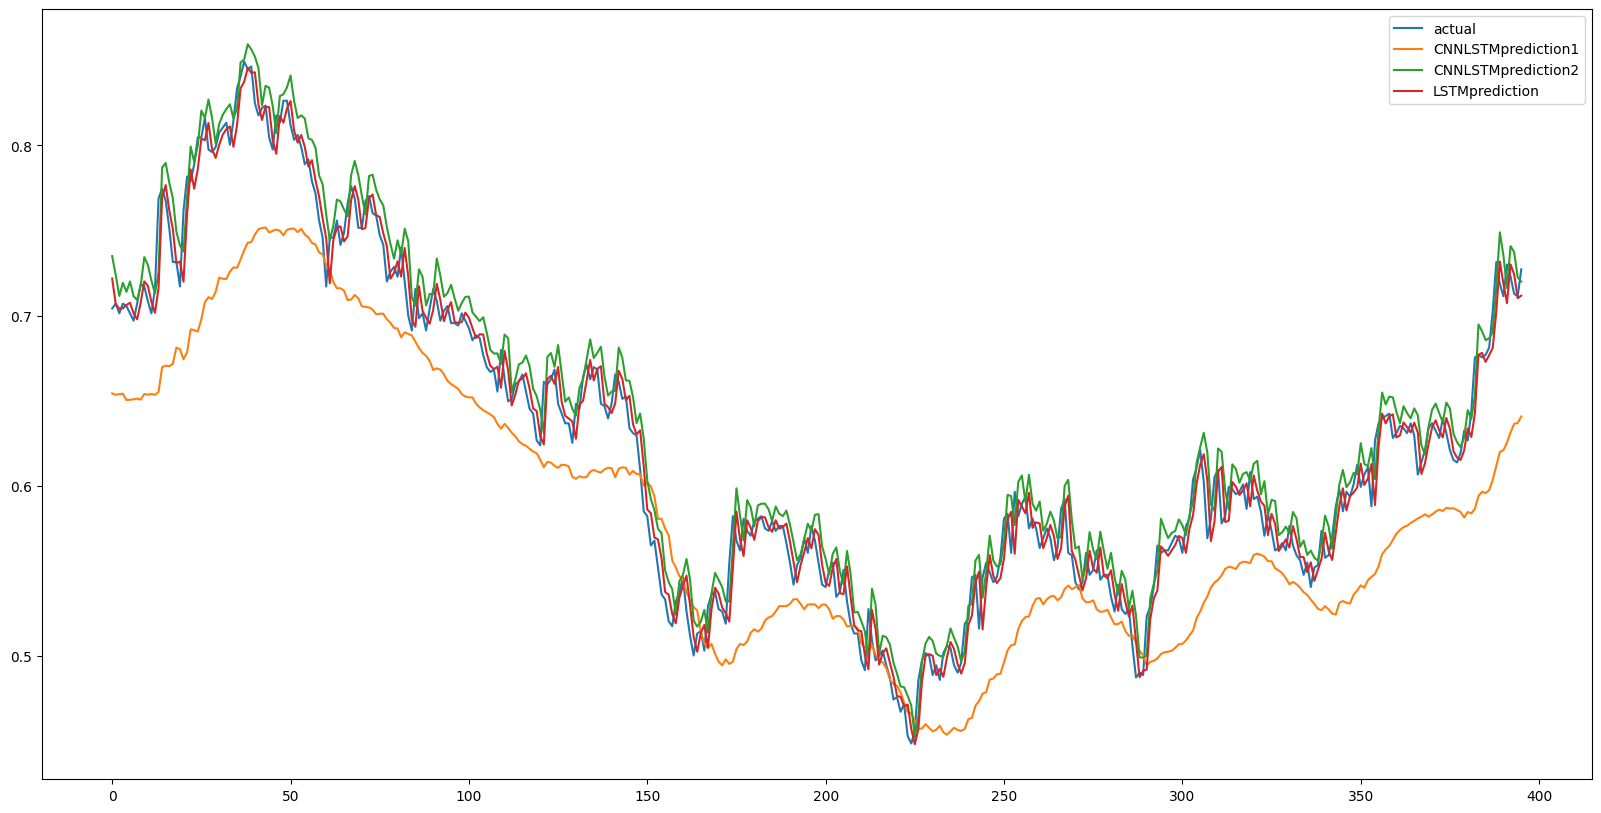

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(CNN_LSTMpred, label='CNNLSTMprediction1')
plt.plot(CNN_LSTMpred2, label='CNNLSTMprediction2')
plt.plot(LSTMpred, label='LSTMprediction')
plt.legend()
plt.show()

정확도 측정
x_train, x_test, y_train, y_test

In [ ]:
yy = np.asarray(y_test)[20:].reshape(396)
CNN_LSTM1 = np.asarray(CNN_LSTMpred).reshape(396)
CNN_LSTM2 = np.asarray(CNN_LSTMpred2).reshape(396)
LSTM = np.asarray(LSTMpred).reshape(396)

In [ ]:
a = [0 for i in range(386)]
c = [0 for i in range(386)]
d = [0 for i in range(386)]
f = [0 for i in range(386)]


for i in range(0, 385):
    if yy[i] > yy[i+1]:
        a[i] = 0
    else:
        a[i] = 1

for i in range(0, 385):
    if CNN_LSTM1[i] > CNN_LSTM1[i+1]:
        c[i] = 0
    else:
        c[i] = 1

for i in range(0, 385):
    if CNN_LSTM2[i] > CNN_LSTM2[i+1]:
        d[i] = 0
    else:
        d[i] = 1

for i in range(0, 385):
    if LSTM[i] > LSTM[i+1]:
        f[i] = 0
    else:
        f[i] = 1



In [ ]:
for i in range(5):
  globals()["answer%d"%i] = 0

for i in range(0,385):
  if a[i] == c[i]:
    answer2+=1
for i in range(0,385):
  if a[i] == d[i]:
    answer3+=1
for i in range(0,385):
  if a[i] == f[i]:
    answer4+=1

print("LSTM_CNN1의 정확도: %lf" % (answer2 / 383))
print("LSTM_CNN2의 정확도: %lf" % (answer3 / 383))
print("LSTM의 정확도: %lf" % (answer4 / 383))

LSTM_CNN1의 정확도: 0.485640
LSTM_CNN2의 정확도: 0.519582
LSTM의 정확도: 0.509138


In [ ]:
a = [0 for i in range(393)]
b = [0 for i in range(393)]
c = [0 for i in range(393)]
d = [0 for i in range(393)]
e = [0 for i in range(393)]

for i in range(0, 392):
    if yy[i] > yy[i+1]:
        a[i] = 0
    else:
        a[i] = 1

for i in range(0, 392):
    if GRU[i] > GRU[i+1]:
        b[i] = 0
    else:
        b[i] = 1

for i in range(0, 392):
    if LSTM[i] > LSTM[i+1]:
        c[i] = 0
    else:
        c[i] = 1

for i in range(0, 392):
    if LSTMmean[i] > LSTMmean[i+1]:
        d[i] = 0
    else:
        d[i] = 1

for i in range(0, 392):
    if GRUmean[i] > GRUmean[i+1]:
        e[i] = 0
    else:
        e[i] = 1

In [ ]:
for i in range(5):
  globals()["answer%d"%i] = 0

for i in range(0,392):
  if a[i] == b[i]:
    answer1+=1
for i in range(0,392):
  if a[i] == c[i]:
    answer2+=1
for i in range(0,392):
  if a[i] == d[i]:
    answer3+=1
for i in range(0,392):
  if a[i] == e[i]:
    answer4+=1

print("GRU의 정확도: %lf" % (answer1 / 393))
print("LSTM의 정확도: %lf" % (answer2 / 393))
print("LSTM(평활화)의 정확도: %lf" % (answer3 / 393))
print("GRU(평활화)의 정확도: %lf" % (answer4 / 393))

IndexError: ignored